# AMATH 352B

## Homework Assignment #4 - due 5/6/2022

This Jupyter Notebook consists of several cells.  Some of the cells are **Markdown** cells, and some of the cells are **Code** cells.

Once you have honed your Notebook to the point where you're ready to turn it in, convert the Notebook to HTML and upload both the Notebook (the .ipynb file) and the HTML version of it to Canvas.  There are potentially issues in the conversion involving figures, graphics, and imported files to solve, so leave yourself enough time to get this done.

In [29]:
from math import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import qr, solve_triangular
import matplotlib as mpl
import matplotlib.pyplot as plt

## Problem #1

Consider the points in the plane $(0,1)$, $(1,1)$, $(2,0)$, $(3,0)$, and $(4,1)$.  Write Python code to plot those points.

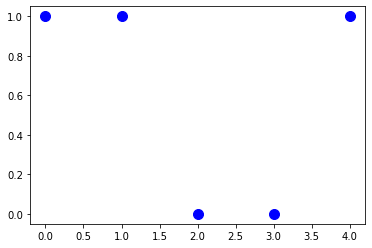

In [30]:
plt.plot([0, 1, 2, 3, 4],
         [1, 1, 0, 0, 1],
         'b', marker = 'o', markersize=10, linestyle="")

## Problem #2

We want to model the five points from problem #1 as a quadratic polynomial of the form

$$p(x)=c_0+c_1x+c_2x^2$$

Write down an overdetermined linear system of the form $Ax=b$ so that each point $(x_i,y_i)$ is represented by an equation of the form $p(x_i)=y_i$

$$
\begin{pmatrix}1& 1& 1& 1& 1\cr 0& 1& 2& 3& 4\cr 0& 1& 4& 9& 16\cr\end{pmatrix}
\begin{pmatrix}1& 0& 0\cr 1& 1& 1\cr 1& 2& 4\cr 1& 4& 16\cr\end{pmatrix}
\begin{pmatrix}c_0\cr c_1\cr c_2\cr\end{pmatrix}=
\begin{pmatrix}1& 1& 1& 1& 1\cr 0& 1& 2& 3& 4\cr 0& 1& 4& 9& 16\cr\end{pmatrix}
\begin{pmatrix}1\cr 1\cr 0\cr 0\cr 1 \cr\end{pmatrix}
$$
$$
\begin{pmatrix}5& 10& 30\cr 10& 30& 100\cr 30& 100& 354\cr\end{pmatrix}
\begin{pmatrix}c_0\cr c_1\cr c_2\cr\end{pmatrix}=
\begin{pmatrix}3\cr 5\cr 17\cr\end{pmatrix}
$$


## Problem #3

For the overdetermined linear system $Ax=b$ from problem #2, write down the normal equations


$$5c_0+10c_1+30c_2 = 3$$
$$10c_0+30c_1+100c_2 = 5$$
$$30c_0+100c_1+354c_2 = 17$$

## Problem #4

Write Python code to solve the normal equations derived in problem #3

In [31]:
A = np.array([[1, 0, 0],
              [1, 1, 1],
              [1, 2, 4],
              [1, 3, 9],
              [1, 4, 16]])
b = np.array([1, 1, 0, 0, 1])

Asquare = A.T @ A
Bsquare = A.T @ b

lu, piv = lu_factor(Asquare)
xLU = lu_solve((lu, piv), Bsquare)
print("Answer:", luanswer)
print("LU Residual", (np.linalg.norm((A @ xLU) - b)) ** 2)

Answer: [ 1.22857143 -0.95714286  0.21428571]
LU Residual 0.4571428571428571


## Problem #5

Write Python code to determine the least squares solution to the overdetermined linear system from problem #2 using the $QR$ factorization.  Verify that the solution is the same as problem #4

In [32]:
A = np.array([[1, 0, 0],
              [1, 1, 1],
              [1, 2, 4],
              [1, 3, 9],
              [1, 4, 16]])
b = np.array([1, 1, 0, 0, 1])

q, r = qr(A, overwrite_a=False, lwork=None, mode='full', pivoting=False, check_finite=True)
qtb = q.T @ b
x = solve_triangular(r[:3], qtb[:3])

print("Answer:", x)
print("QR Residual", (np.linalg.norm((r @ x) - qtb)) ** 2)

Answer: [ 1.22857143 -0.95714286  0.21428571]
QR Residual 0.45714285714285785


## Problem #6

Write Python code to plot the data points (just as in problem #1) and also the quadratic polynomial that is the least squares fit to those points.  Demonstrate that the sum of squares of the residual from solving problem #4 is the same as the sum of squares of the residuals in $Q^Tb$ from problem #5

LU Residual 0.4571428571428571
QR Residual 0.45714285714285785


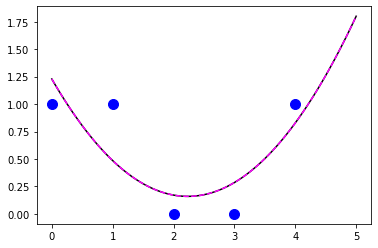

In [33]:
plt.plot([0, 1, 2, 3, 4],
         [1, 1, 0, 0, 1],
         'b', marker = 'o', markersize=10, linestyle="")

qranswer = solve_triangular(r[:3], qtb[:3])

xvec = np.linspace(0, 5, 101)
yvec = qranswer[0] + (qranswer[1] * xvec) + (qranswer[2] * (xvec ** 2))

yvecLU = luanswer[0] + (luanswer[1] * xvec) + (luanswer[2] * (xvec ** 2))

plt.plot(xvec, yvec, 'black')
plt.plot(xvec, yvecLU, color='magenta', linestyle='dashed')
print("LU Residual", (np.linalg.norm((A @ xLU) - b)) ** 2)
print("QR Residual", (np.linalg.norm((r @ x) - qtb)) ** 2)

## Problem #7

Marcy has been studying enrollment at the University of Washington.  The spring enrollment for the past ten years is shown in the following table:

| Year | Students |
| ---- | -------- |
| 2022 | 44939 |
| 2021 | 44157 |
| 2020 | 43617 |
| 2019 | 43859 |
| 2018 | 43035 |
| 2017 | 42355 |
| 2016 | 42023 |
| 2015 | 41294 |
| 2014 | 40434 |
| 2013 | 39896 |

She wants to estimate by how much enrollment has been increasing each year and also by how much that rate of increase is accelerating (or decelerating).  Fortunately, Marcy took Applied Math 352 when she was a student at UW, so she knows exactly which of the following facts will help her solve this problem

* The University of Washington was founded in 1861
* Rates of change can be computed by taking derivatives
* Decision trees are sometimes an effective tool for solving machine learning problems
* The best way to compute an average rate of change is to employ a model in which the desired rate of change is constant
* The increase in enrollment correlates with increases in tuition
* Last week, Charles caught a bass from the dock on the east side of the Montlake Cut
* The UW registrar is responsible for tracking enrollment

[-1.04873542e+06  5.40915152e+02]
Enrollment increasing: 540.9151515157894 students per year


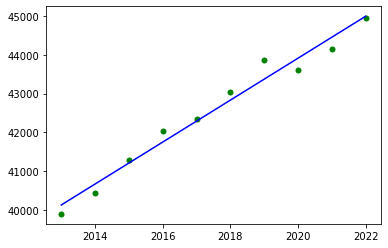

In [34]:
enrollment = [39896, 40434, 41294, 42023, 42355, 43035, 43859, 43617, 44157, 44939]
time = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

degree = 1
tvec = np.array(time)
vmat = np.array([[x ** j for j in range(degree + 1)] for x in tvec])
lupiv = lu_factor(vmat.T @ vmat)

avec = lu_solve(lupiv, vmat.T @ enrollment)
xvec = np.linspace(2013, 2022, 10)
yvec = np.zeros(10)

for i in range(degree, -1, -1):
    yvec *= xvec
    yvec += avec[i]
plt.plot(time, enrollment, 'g', marker = 'o', markersize=5, linestyle="")
plt.plot(xvec, yvec, 'b')
print(avec)
print("Enrollment increasing:", avec[1], "students per year")

[-9.24090178e+07  9.11089127e+04 -2.24456004e+01]
Rate of increase acceleration: -44.89120077880826


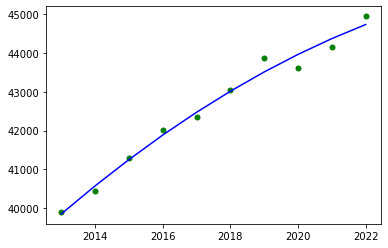

In [35]:
degree = 2
tvec = np.array(time)
vmat = np.array([[x ** j for j in range(degree + 1)] for x in tvec])
lupiv = lu_factor(vmat.T @ vmat)
xvec = np.linspace(2013, 2022, 10)
yvec = np.zeros(10)

avec = lu_solve(lupiv, vmat.T @ enrollment)

for i in range(degree, -1, -1):
    yvec *= xvec
    yvec += avec[i]
plt.plot(time, enrollment, 'g', marker = 'o', markersize=5, linestyle="")
plt.plot(xvec, yvec, 'b')
print(avec)
print("Rate of increase acceleration:", avec[2] * 2)